# Principal Component Analysis

BitTiger DS501

Aug 2017

### Load data

In [1]:
import pandas as pd
import numpy as np

df_hitters = pd.read_csv('data/hitters.csv')

# Dropping NAs
df_hitters.dropna(inplace=True)

In [29]:
df_hitters.info()
## 有三个object 需要转化为numerical data

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null int64
Division     263 non-null int64
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null int64
dtypes: float64(1), int64(19)
memory usage: 43.1+ KB


In [2]:
df_hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
df_hitters['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

### Cleaning the data
怎么把categorical变成numerical

In [11]:
# Binarizing columns
def map_binary(df, col): ##定义了一个function,对df -- dataset的col进行操作
    vals = df[col].unique()  ##找到unique column，就是比如说上面division列有两个不同的值，所以vals=['E','W']
    df[col] = df[col].apply(lambda x: 0 if x == vals[0] else 1)

map_binary(df_hitters, 'League')
map_binary(df_hitters, 'NewLeague')
map_binary(df_hitters, 'Division')

### Get features and target

In [12]:
feature_names = df_hitters.columns.difference(['Salary'])  ##出了Salary这列剩下的都取出来--difference的用法

X = df_hitters[feature_names].astype(float).values

y = df_hitters['Salary'].values


### Stardardize features

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

#三部曲 import, initialize, fit_transform

### Train test split

In [14]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

C:\Users\blanc\Anaconda3\envs\ipykernel_py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Use PCA to transform data and get princial components

In [15]:
from sklearn.decomposition import PCA

n_col = X_train.shape[1] #19

pca = PCA(n_components=n_col) #建立PCA的数量，和原来data的全部列数一样

train_components = pca.fit_transform(X_train) # training---fit_transform
## fit(X_train)
## train_components = pca.transform(X_train) n上面这一行跟这两行的意思一样的
test_components = pca.transform(X_test)    ##testing-- only transform


In [16]:
# Inspect the principal axes in feature space
pca.components_

array([[ 7.33922745e-03,  1.85145295e-01,  3.36008029e-01,
         3.36905477e-01,  3.35835564e-01,  3.49372342e-01,
         3.46247730e-01,  3.19102624e-01,  2.53013254e-02,
         3.29534159e-03,  1.82511115e-01,  1.98354238e-01,
         3.47853584e-02,  2.20743882e-02,  8.83588003e-02,
         2.21314711e-01,  1.83961529e-01,  1.92798009e-01,
         2.82660046e-01],
       [-1.37002768e-01, -3.81492386e-01,  1.86991507e-01,
         1.80441490e-01,  1.15909883e-01,  1.56138406e-01,
         1.70952144e-01,  1.78633694e-01, -3.27674496e-02,
        -1.54880591e-01, -3.72073299e-01, -2.51217970e-01,
        -1.27159074e-01, -1.01794027e-01, -2.08825037e-01,
        -3.23837913e-01, -3.77329322e-01, -2.47807859e-01,
         2.52611764e-01],
       [ 3.84771453e-01,  1.17328883e-01,  7.04590089e-02,
         7.38795193e-02, -1.21472562e-01, -2.67944585e-03,
         3.01995021e-02,  9.95068060e-03, -1.47571051e-02,
         3.60320765e-01,  1.08814533e-01, -2.07127440e-01,
    

In [17]:
pca.components_.T.dot(pca.components_)

array([[ 1.00000000e+00, -3.02047462e-16,  7.73411259e-17,
         5.43927584e-17,  2.72597905e-16,  1.24215832e-16,
         1.09386607e-16,  6.89512172e-17,  3.35814251e-17,
        -3.22781616e-16, -2.88082625e-16,  1.74777690e-16,
        -6.77530090e-17, -7.86332827e-17, -2.50053209e-17,
        -1.86161351e-16,  1.26245636e-17,  1.58090029e-16,
         8.92085194e-18],
       [-3.02047462e-16,  1.00000000e+00,  9.65392118e-17,
         2.43226757e-16, -1.88481976e-16,  1.20927302e-16,
         1.04546395e-16,  1.36298204e-16, -1.27368670e-16,
        -4.76107840e-16,  5.50735973e-16, -1.85340932e-16,
        -7.67238650e-18,  8.01013391e-17,  4.90819526e-17,
         9.34998045e-17, -7.87980458e-17, -1.36721780e-16,
         1.01713048e-16],
       [ 7.73411259e-17,  9.65392118e-17,  1.00000000e+00,
         1.33984908e-16,  8.48901352e-17,  1.93648739e-16,
         1.57519644e-16,  1.13060848e-17, -2.77487496e-16,
        -1.04646790e-16,  1.28160505e-16,  1.28607003e-16,
    

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

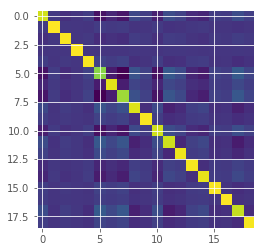

In [19]:
plt.imshow(np.cov(pca.components_.T))
plt.show()

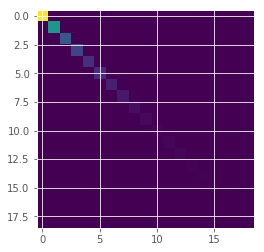

In [20]:
# visualize the covariance of transformed feature matrix
plt.imshow(np.cov(train_components.T))
plt.show()

### See how much variance the principal components explain

Text(0,0.5,'Variance Explained')

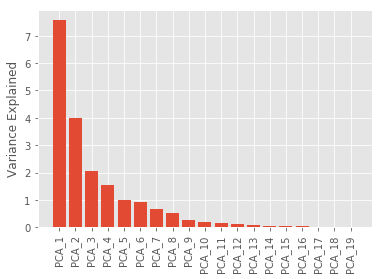

In [21]:
pca_range = np.arange(n_col) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, pca.explained_variance_, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Variance Explained')

### See how much (percentage of) variance the principal components explain

Text(0,0.5,'Proportion of Variance Explained')

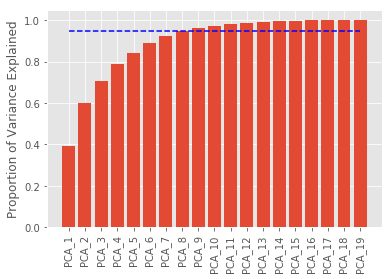

In [32]:
pca_range = np.arange(n_col) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, np.cumsum(pca.explained_variance_ratio_), align='center')

#划线选取95%的variance需要的PCA的个数

plt.plot((1,19),(0.95,0.95),'b--')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Proportion of Variance Explained')



In [ ]:
pca_9=PCA(n_components=9)
#这样就可以把PCA选9的用到所有pca里面

### See how much (percentage of) variance the principal components explain - horizontal bar chart

Text(0.5,0,'Proportion of Variance Explained')

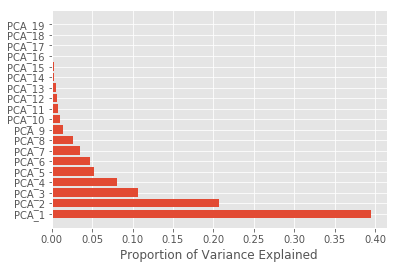

In [23]:
plt.barh(pca_range, pca.explained_variance_ratio_, align='center')
xticks = plt.yticks(pca_range, pca_names)
plt.xlabel('Proportion of Variance Explained')

### Get train and test error with K-Fold cross validation.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import cross_val_score

train_mse_arr = np.array([])
test_mse_arr = np.array([])

for i in pca_range: #对于每个PCA数目对regression结果的影响

    train_subset = train_components[:, :i]

    pca_linear = LinearRegression()

    pca_linear.fit(train_subset, y_train)

    # Get train error
    train_mse = cross_val_score(pca_linear, train_subset, y=y_train,
                                scoring='mean_squared_error', cv=10) * -1 ##因为他的结果都是一个负的，所以要 times -1
    train_mse_arr = np.append(train_mse_arr, train_mse.mean())
    
    # Get test error
    test_set = test_components[:, :i]
    test_mse = mean_squared_error(pca_linear.predict(test_set), y_test)
    test_mse_arr = np.append(test_mse_arr, test_mse)

C:\Users\blanc\Anaconda3\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\blanc\Anaconda3\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\blanc\Anaconda3\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\blanc\Anaconda3\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo

C:\Users\blanc\Anaconda3\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\blanc\Anaconda3\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\blanc\Anaconda3\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\blanc\Anaconda3\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo

### Plot train mse

# of PCs that gives lowest train MSE: 7 @ 107809.53579112724


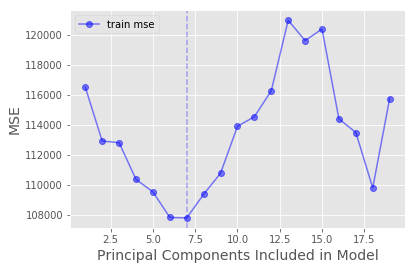

In [25]:
plt.plot(pca_range, train_mse_arr, marker='o', color='b', alpha=.5, label='train mse')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)
plt.legend(loc='best')

best_train_mse_pca, min_train_mse = np.argmin(train_mse_arr) + 1, np.min(train_mse_arr)

plt.axvline(best_train_mse_pca, color='b', ls='--', alpha=.3)

print '# of PCs that gives lowest train MSE:', best_train_mse_pca, '@', min_train_mse

### Plot test mse

# of PCs that gives lowest test MSE: 17 @ 125574.0101308444


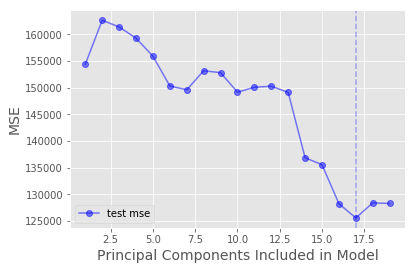

In [26]:
plt.plot(pca_range, test_mse_arr, marker='o', color='b', alpha=.5, label='test mse')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)
plt.legend(loc='best')

best_test_mse_pca, min_test_mse = np.argmin(test_mse_arr) + 1, np.min(test_mse_arr)

plt.axvline(best_test_mse_pca, color='b', ls='--', alpha=.3)

print '# of PCs that gives lowest test MSE:', best_test_mse_pca, '@', min_test_mse

##通过结果发现train score结果不可预测，但是test的话还是pca 维度越多越好

### Plot train and test mse

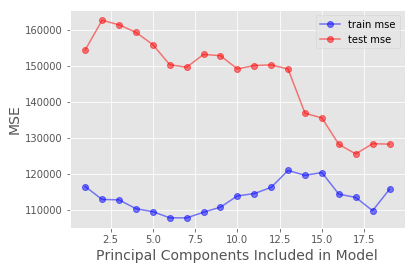

In [27]:
plt.plot(pca_range, train_mse_arr, marker='o', color='b', alpha=.5, label='train mse')
plt.plot(pca_range, test_mse_arr, marker='o', color='r', alpha=.5, label='test mse')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Principal Components Included in Model', fontsize=14)
plt.legend(loc='best')